In [36]:
import pandas as pd

def load_dataframe(path):
    df = pd.read_csv(path)
    df = df.drop(['Country Code', 'Indicator Code'], axis =1)
    year_df = df.set_index(['Country Name', 'Indicator Name'])
    country_df = year_df.stack().unstack('Country Name')
    country_df.index.names = ['Indicator Name', 'years']
    return year_df, country_df 

In [55]:
#analysing countries metadata

In [55]:
countries_df = pd.read_csv('data/Metadata_Country_API_19_DS2_en_csv_v2_3931355.csv', index_col=False)

In [69]:
countries_df[countries_df['IncomeGroup']=='Low income'].groupby('Region').count()

,Country Code,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
Region,,,,,
East Asia & Pacific,1,1,0,1,0
Middle East & North Africa,2,2,2,2,0
South Asia,1,1,1,1,0
Sub-Saharan Africa,23,23,9,23,0


In [70]:
countries_df[countries_df['IncomeGroup']=='High income'].groupby('Region').count()

,Country Code,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
Region,,,,,
East Asia & Pacific,14,14,8,14,0
Europe & Central Asia,37,37,21,37,0
Latin America & Caribbean,16,16,1,16,0
Middle East & North Africa,8,8,1,8,0
North America,3,3,1,3,0
Sub-Saharan Africa,1,1,0,1,0


In [84]:
countries_df.loc[(countries_df['IncomeGroup']=='High income') & (countries_df['Region']=='Sub-Saharan Africa')]


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
225,SYC,Sub-Saharan Africa,High income,NaN,Seychelles,NaN


In [37]:
year_df, country_df = load_dataframe('data/final.csv')

In [86]:
selected_countries = ['Seychelles', 'United Kingdom', 'Afghanistan', 'Singapore']

In [95]:
country_df.groupby(level=0).aggregate(['first','last','min','max'])[selected_countries+["World"]].loc[['Urban population (% of total population)','Agricultural land (% of land area)', 'CO2 emissions (kt)']]

Country Name                             Seychelles                        \
                                              first        last       min   
Indicator Name                                                              
Urban population (% of total population)  27.673000   57.546000  27.67300   
Agricultural land (% of land area)        10.869565    3.369565   3.26087   
CO2 emissions (kt)                         7.334000  620.000000   7.33400   

Country Name                                         United Kingdom  \
                                                 max          first   
Indicator Name                                                        
Urban population (% of total population)   57.546000      78.444000   
Agricultural land (% of land area)         13.043478      81.841855   
CO2 emissions (kt)                        750.000000  584299.780000   

Country Name                                                           \
                                                  last            min   
Indicator Name                                                          
Urban population (% of total population)      83.90300      77.030000   
Agricultural land (% of land area)            71.71852      70.073988   
CO2 emissions (kt)                        358800.00000  358800.000000   

Country Name                                            Afghanistan  \
                                                    max       first   
Indicator Name                                                        
Urban population (% of total population)      83.903000    8.401000   
Agricultural land (% of land area)            81.841855   57.745918   
CO2 emissions (kt)                        660863.073000  414.371000   

Country Name                                                       \
                                                 last         min   
Indicator Name                                                      
Urban population (% of total population)    26.026000    8.401000   
Agricultural land (% of land area)          58.081365   57.745918   
CO2 emissions (kt)                        7440.000000  414.371000   

Country Name                                              Singapore  \
                                                   max        first   
Indicator Name                                                        
Urban population (% of total population)     26.026000   100.000000   
Agricultural land (% of land area)           58.288148    20.895522   
CO2 emissions (kt)                        12260.000000  1393.460000   

Country Name                                                        \
                                                  last         min   
Indicator Name                                                       
Urban population (% of total population)    100.000000  100.000000   
Agricultural land (% of land area)            0.930889    0.930889   
CO2 emissions (kt)                        47360.000000  674.728000   

Country Name                                                   World  \
                                                   max         first   
Indicator Name                                                         
Urban population (% of total population)    100.000000  3.361797e+01   
Agricultural land (% of land area)           20.895522  3.596509e+01   
CO2 emissions (kt)                        47430.000000  9.463838e+06   

Country Name                                                          \
                                                  last           min   
Indicator Name                                                         
Urban population (% of total population)  5.615635e+01  3.361797e+01   
Agricultural land (% of land area)        3.690352e+01  3.596509e+01   
CO2 emissions (kt)                        3.404105e+07  9.423934e+06   

Country Name                                            
                                                   max  
I

## Correlations between indicators

In [270]:
def plot_scatter_plot(x, y, title, xlabel, ylabel, color='blue', rotation=0, subplot_num=None, axis = None, fillcolor='skyblue', figsize=(5,5), scale = None): 
    """plots the line graph based on input parameters

    Args:
        x (dataframe): data to be plotted on x axis
        y (dataframe): data to be plotted on y axis      
        title (str) : title of the plot
        xlabel (str) : description of x axis
        ylabel (str) : description of y axis
        color (str) : color of the line plot
        rotation (str) : rotation of xlabels
        subplot_num (str) : subplot number if any 
        axis (str) : predefined figure axis if any
        fillcolor (str) : fillcolor inside line plot
        figsize (str) : size of the plot
        scale (str) : scale of y axis values eg: 'M', 'K'        

    Returns:
        plot: line graph with mentioned parameters
    """
    import numpy as np
    if axis == None:
        figure, axis = plt.subplots(1, 1, figsize=figsize)
    if subplot_num != None:
        axis = axis[subplot_num]
    print(axis)
    axis.scatter(x, y, color =color)
    axis.set_title(title)
    plt.setp(axis.get_xticklabels(), rotation=rotation)
    # plt.fill_between(x, y, alpha=0.4, color=fillcolor)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    current_values = plt.gca().get_yticks()
    if scale == None:
        axis.set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    elif scale == 'K':
        axis.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in plt.gca().get_yticks()/1E3])
    elif scale == 'M':
        axis.set_yticklabels(['{:,.0f}'.format(x) + 'M' for x in plt.gca().get_yticks()/1E6])
    plt.show()
 

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\dj\AppData\Local\Temp/ipykernel_34396/3566148914.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


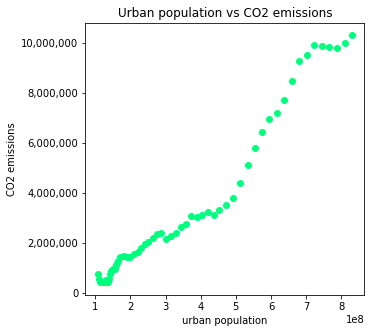

AxesSubplot(0.125,0.125;0.775x0.755)


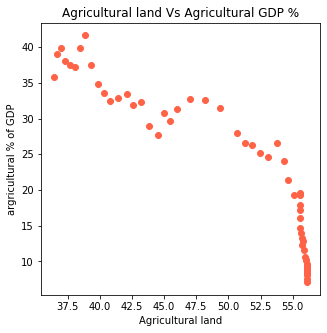

AxesSubplot(0.125,0.125;0.775x0.755)


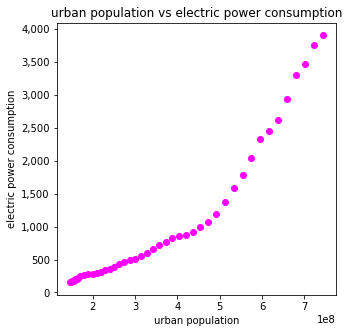

In [279]:
india_2020_indicators = pd.DataFrame(year_df.loc['China']).T
plot_scatter_plot(india_2020_indicators['Urban population'],india_2020_indicators['CO2 emissions (kt)'], 'Urban population vs CO2 emissions', 'urban population', 'CO2 emissions', color='springgreen')
plot_scatter_plot(india_2020_indicators['Agricultural land (% of land area)'], india_2020_indicators['Agriculture, forestry, and fishing, value added (% of GDP)'], 'Agricultural land Vs Agricultural GDP %','Agricultural land', 'argricultural % of GDP', color='tomato')
plot_scatter_plot(india_2020_indicators['Urban population'], india_2020_indicators['Electric power consumption (kWh per capita)'], 'urban population vs electric power consumption','urban population', 'electric power consumption', color='magenta')

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\dj\AppData\Local\Temp/ipykernel_34396/3566148914.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


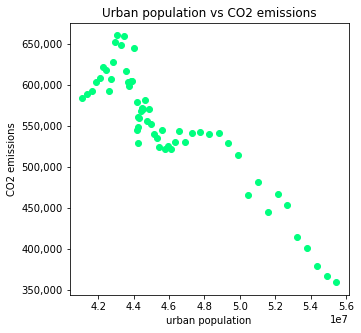

AxesSubplot(0.125,0.125;0.775x0.755)


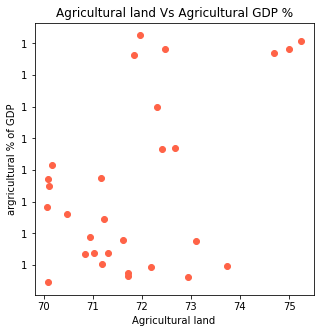

AxesSubplot(0.125,0.125;0.775x0.755)


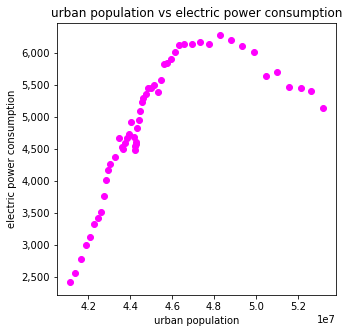

In [287]:
india_2020_indicators = pd.DataFrame(year_df.loc['United Kingdom']).T
plot_scatter_plot(india_2020_indicators['Urban population'],india_2020_indicators['CO2 emissions (kt)'], 'Urban population vs CO2 emissions', 'urban population', 'CO2 emissions', color='springgreen')
plot_scatter_plot(india_2020_indicators['Agricultural land (% of land area)'], india_2020_indicators['Agriculture, forestry, and fishing, value added (% of GDP)'], 'Agricultural land Vs Agricultural GDP %','Agricultural land', 'argricultural % of GDP', color='tomato')
plot_scatter_plot(india_2020_indicators['Urban population'], india_2020_indicators['Electric power consumption (kWh per capita)'], 'urban population vs electric power consumption','urban population', 'electric power consumption', color='magenta')